In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [33]:
#Read the data
t0 = pd.read_csv("/content/ToyotaCorolla.csv",encoding ='latin1')
t0.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [34]:
t0.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [35]:
cols = ['Id', 'Model', 'Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
       'Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar']
t1 = t0.drop(cols, axis=1)

In [36]:
t1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [37]:
t1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [38]:
t1.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Quartax'}, inplace=True)

In [39]:
t1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quartax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [40]:
#check for missing values
t1.isna().sum()

Price      0
Age        0
KM         0
HP         0
cc         0
Doors      0
Gears      0
Quartax    0
Weight     0
dtype: int64

# Correlation Matrix

In [41]:
t1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quartax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quartax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables

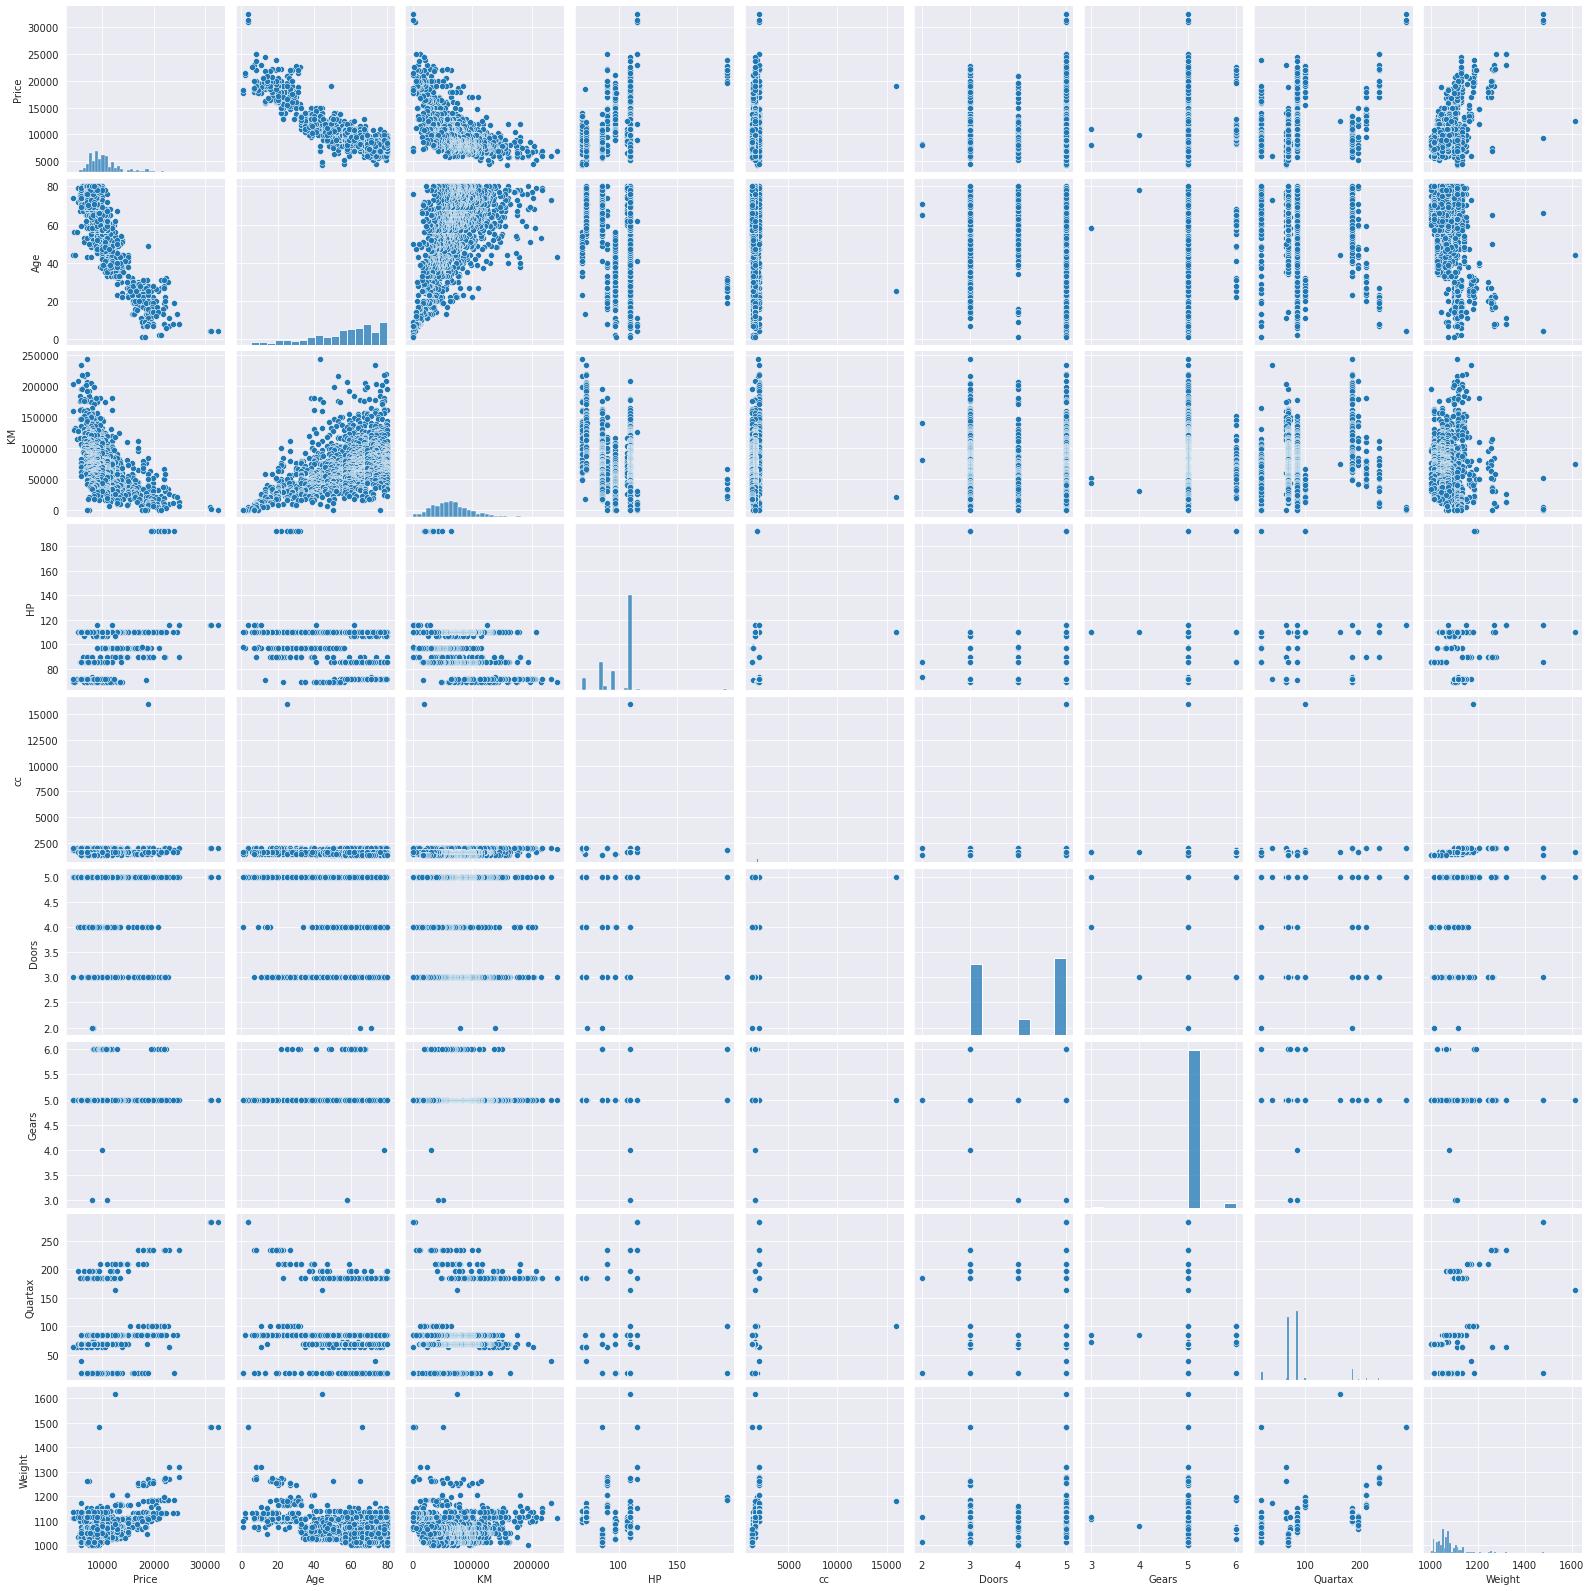

In [42]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(t1)

# Preparing a model

In [43]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quartax+Weight',data=t1).fit()

In [44]:
#Coefficients
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Quartax         3.949081
Weight         16.958632
dtype: float64

In [45]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Quartax       3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Quartax       2.619148e-03
Weight        2.048576e-52
dtype: float64


In [46]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [48]:
t1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quartax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [52]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Quartax         3.949081
Weight         16.958632
dtype: float64

In [58]:
#New data for prediction
preddata=pd.DataFrame({'Age':23,"KM":46986,"HP":90,"cc":2000,"Doors":3,"Gears":5,"Quartax":210,"Weight":1165},
                   index=[1])

In [55]:
model.predict(preddata)

1    16812.580505
dtype: float64

In [76]:
Error = ((16812.580505-13500)/13500)*100
Error


24.537633370370383